In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import colors as mcolors
import os, copy
from PIL import Image

In [25]:
def init_normal(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight)
        if m.bias is not None:
            m.bias.data.fill_(0.01)

class NN(nn.Module):
    def __init__(self, activation=nn.Tanh, num_neurons=16, num_layers=9):
        """
        Initialize the neural network.
        :param activation: Activation function for each layer.
        :param num_neurons: Number of neurons in each hidden layer.
        :param num_layers: Total number of layers (must be at least two).
        """
        super(NN, self).__init__()
        layers = [nn.Linear(2, num_neurons, bias=True), activation()]
        for _ in range(num_layers - 1):
            layers += [nn.Linear(num_neurons, num_neurons, bias=False), activation()]
        layers += [nn.Linear(num_neurons, 3, bias=False), nn.Sigmoid()]
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

def gen_new_image(size_x, size_y, save=True, **kwargs):
    net = NN(**kwargs)
    net.apply(init_normal)
    img_colors = run_net(net, size_x, size_y)
    plot_colors(img_colors)
    if save:
        save_colors(img_colors)
    return net, img_colors

def run_net(net, size_x=128, size_y=128):
    assert size_x > 0 and size_y > 0, "size_x and size_y must be greater than 0"
    x, y = np.meshgrid(np.linspace(-0.5, 0.5, size_x), np.linspace(-0.5, 0.5, size_y))
    grid = np.stack((x, y), axis=-1)
    grid = grid.reshape(-1, 2)
    img = net(torch.tensor(grid, dtype=torch.float32)).detach().numpy()
    return img.reshape(size_x, size_y, 3)

def plot_colors(colors, fig_size=4):
    plt.figure(figsize=(fig_size, fig_size))
    plt.imshow(colors, interpolation='nearest', vmin=0, vmax=1)

def save_colors(colors):
    filename = f"image_{np.random.randint(100000)}.png"
    plt.imsave(filename, colors)
    print(f"Image saved as {filename}")

def run_plot_save(net, size_x, size_y, fig_size=8):
    colors = run_net(net, size_x, size_y)
    plot_colors(colors, fig_size)
    save_colors(colors)

Image saved as image_96499.png


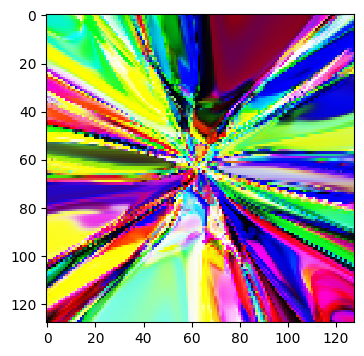

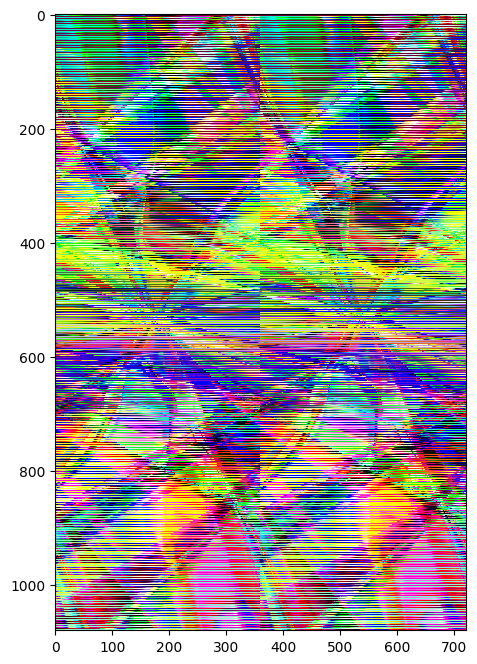

In [26]:
# Generate, plot, and save images
n, c = gen_new_image(128, 128, save=False, num_neurons=32)
run_plot_save(n, 1080, 720)

2 layers
5 layers
8 layers
11 layers
14 layers
17 layers
20 layers
23 layers
26 layers
29 layers


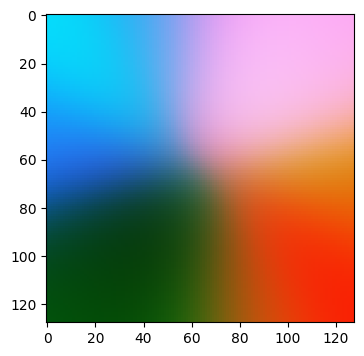

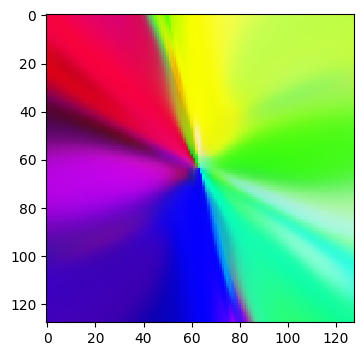

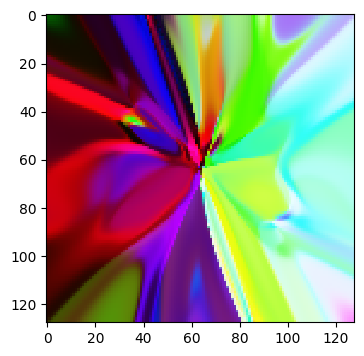

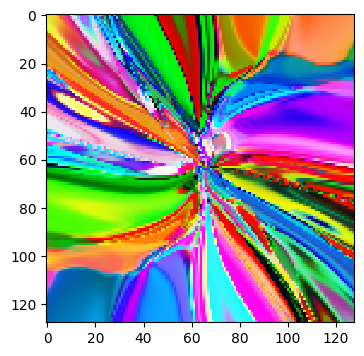

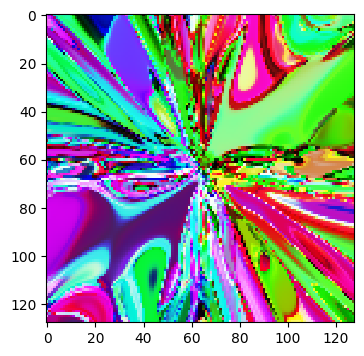

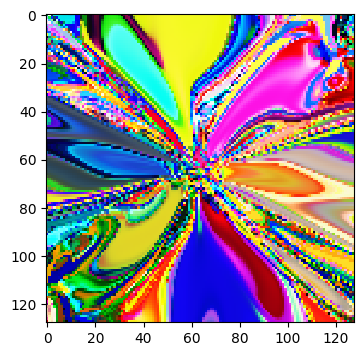

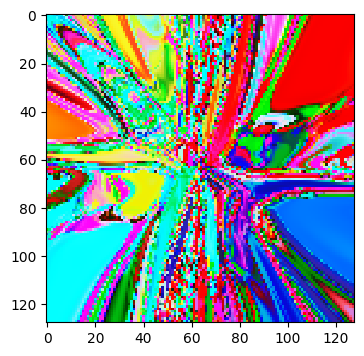

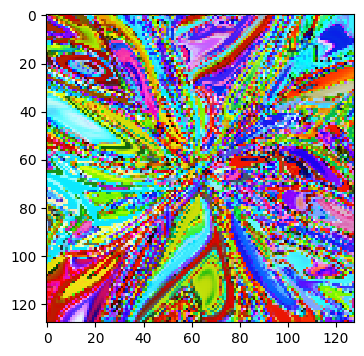

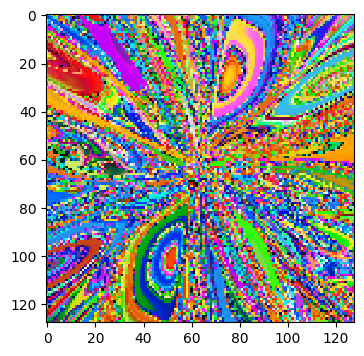

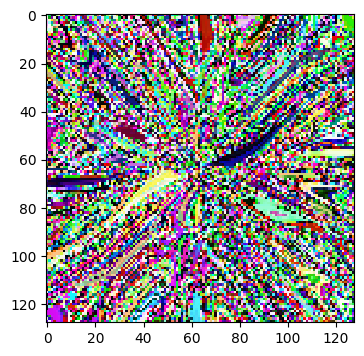

In [27]:
# Experiment with different number of layers
for num_layers in range(2, 30, 3):
    print(f"{num_layers} layers")
    n, c = gen_new_image(128, 128, save=False, num_layers=num_layers)

2 neurons
8 neurons
32 neurons
128 neurons
512 neurons


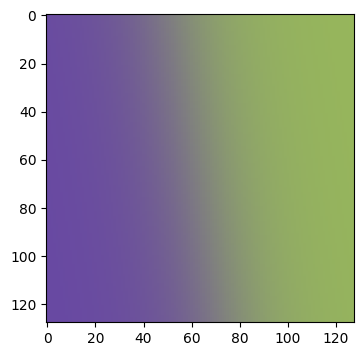

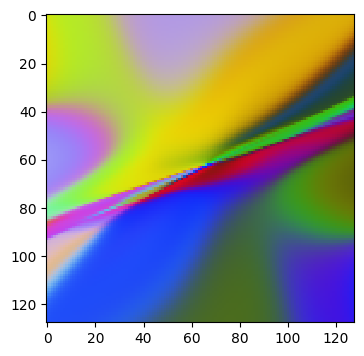

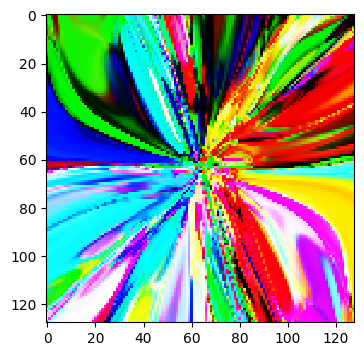

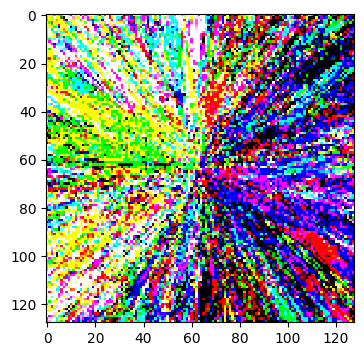

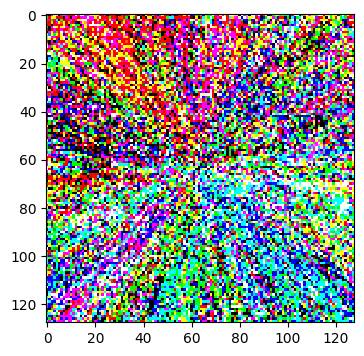

In [28]:
# Experiment with different widths (number of neurons)
for i in range(1, 10, 2):
    print(f"{2**i} neurons")
    n, c = gen_new_image(128, 128, save=False, num_neurons=2**i)

Using ReLU activation


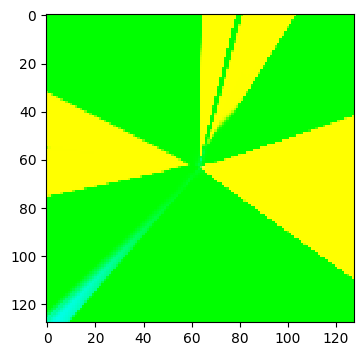

In [29]:
# Experiment with ReLU activation
print("Using ReLU activation")
n, c = gen_new_image(128, 128, save=False, activation=nn.ReLU)